In [1]:
import sys
sys.path.insert(0, '/utils/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply the default theme
sns.set_theme()


from utils import black_scholes, american_binomial_tree,european_binomial_tree


### European

In [2]:

sigma = 0.2
stock_price_T0 = 100
T = 1
N = 50
strike_price = 99
r = 0.06
option_type = "Call" # "Call"

tree = european_binomial_tree.buildTree(stock_price_T0, sigma, T, N)
# print(tree)
option_worth=european_binomial_tree.valueEuropeanOptionMatrix(tree, T, r, strike_price,N, sigma, option_type)
# print(option_worth)
print(option_worth[0][0])




11.546434850755071


##### 2. 
Investigate how your binomial tree estimate compares to the analytical Black-Scholes value of the option. Do experiments for different values of the volatility. The Black-Scholes formula for European option prices is treated in appendix C: please read that carefully.

In [3]:


black_scholes_values = black_scholes.callBlackScholes(stock_price_T0,T,r,strike_price,sigma)
print(black_scholes_values[0])

11.544280227051097


Repeated for various values of volatility:

In [44]:
sigmas = np.linspace(0.01,3.01,250)


bs_list,binomial_list,deltas_binomial,deltas_black_scholes  = [],[],[],[]


for value in sigmas:

#    Call functions for each value of volatility

    values_bs = black_scholes.callBlackScholes(stock_price_T0,T,r,strike_price,value)
    tree = european_binomial_tree.buildTree(stock_price_T0, value, T, N)
    val_bin=european_binomial_tree.valueEuropeanOptionMatrix(tree, T, r, strike_price,N, value, option_type)

    #Append values for call prices 
    bs_list.append(values_bs[0])
    binomial_list.append(val_bin[0][0])

    #Calculate and append Delta values
    
    delta_binomial = (val_bin[1][1]-val_bin[1][0])/(tree[1][1]-tree[1][0])
    delta_black_scholes = values_bs[1]
    deltas_binomial.append(delta_binomial)
    deltas_black_scholes.append(delta_black_scholes)
    
    #Remove variables
    del val_bin,values_bs,tree, delta_binomial, delta_black_scholes

results = {'Binomial' : binomial_list, 'Black Scholes': bs_list}
df = pd.DataFrame(results,index = sigmas )
df.index.name = 'Volatility'
df['Difference'] = df['Black Scholes']-df['Binomial'] 


deltas = {'Binomial Delta' : deltas_binomial , 'Black Scholes Delta': deltas_black_scholes}
df_deltas = pd.DataFrame(deltas,index = sigmas )
df_deltas.index.name = 'Volatility'


df.head(20)

,Binomial,Black Scholes,Difference
Volatility,,,
0.010000,6.765311,6.765311,3.916867e-13
0.022048,6.765599,6.765740,1.415148e-04
0.034096,6.786707,6.789436,2.728766e-03
0.046145,6.887759,6.890584,2.825072e-03
0.058193,7.077926,7.078035,1.091895e-04
0.070241,7.335863,7.333089,-2.774151e-03
0.082289,7.641728,7.636674,-5.053438e-03
0.094337,7.981395,7.974793,-6.602127e-03
0.106386,8.345334,8.337841,-7.493599e-03


Text(0.5, 0.98, 'Comparison between Black Scholes and Binomial tree for different volatilities')

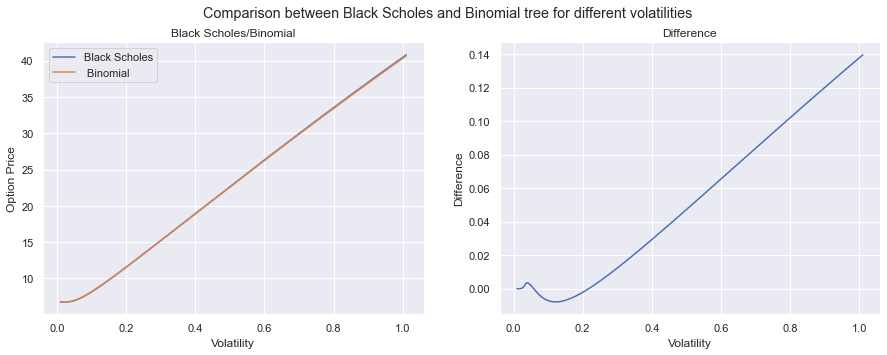

In [34]:

fig, axes = plt.subplots(1, 2,figsize=(15,5))

sns.lineplot(x = 'Volatility', y = 'Black Scholes',data = df, label = 'Black Scholes', ax = axes[0])
sns.lineplot(x= 'Volatility', y = 'Binomial',data = df,  label = ' Binomial', ax = axes[0])



sns.lineplot(x = 'Volatility', y = 'Difference',data = df , ax = axes[1])

axes[0].set_title("Black Scholes/Binomial")
axes[0].set_ylabel('Option Price')

axes[1].set_title("Difference")
plt.suptitle("Comparison between Black Scholes and Binomial tree for different volatilities")

Number of steps,1,2,3,4,5,6,7,8,9,10,...,290,291,292,293,294,295,296,297,298,299
Binomial option,13.156935,10.842582,12.105041,11.221167,11.877161,11.349620,11.779019,11.412268,11.724538,11.448655,...,11.549691,11.540889,11.549665,11.54085,11.549639,11.540811,11.549613,11.540772,11.549588,11.540734
Black Scholes,11.544280,11.544280,11.544280,11.544280,11.544280,11.544280,11.544280,11.544280,11.544280,11.544280,...,11.544280,11.544280,11.544280,11.54428,11.544280,11.544280,11.544280,11.544280,11.544280,11.544280
Difference,1.612655,-0.701698,0.560761,-0.323113,0.332881,-0.194661,0.234739,-0.132012,0.180257,-0.095625,...,0.005411,-0.003391,0.005385,-0.00343,0.005359,-0.003470,0.005333,-0.003508,0.005307,-0.003546


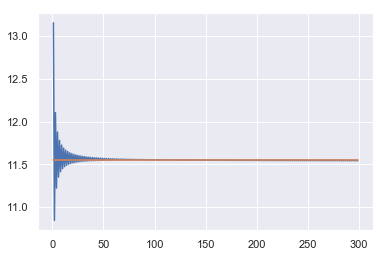

In [8]:
#Convergance for varying step sizes

steps = np.arange(1,300,1)
steps
sigma =0.2
stock_price_T0 = 100
T = 1
strike_price = 99
r = 0.06

results_2 = {}
val_binomial =[]

for step in steps:
    tree = european_binomial_tree.buildTree(stock_price_T0, sigma, T, step)
    val_bin=european_binomial_tree.valueEuropeanOptionMatrix(tree, T, r, strike_price,step, sigma, option_type)
    val_binomial.append(val_bin[0][0])
    del tree, val_bin
# print(val_binomial)
data = {'Binomial option': val_binomial}
df_conv = pd.DataFrame(data, index = steps)
df_conv.index.name = 'Number of steps'

df_conv['Black Scholes'] = black_scholes_values[0]
df_conv['Difference'] = df_conv['Binomial option'] - black_scholes_values[0]


plt.plot(steps, val_binomial)
plt.plot(steps, black_scholes_values[0]*np.ones(len(val_binomial)))
df_conv.T


No handles with labels found to put in legend.


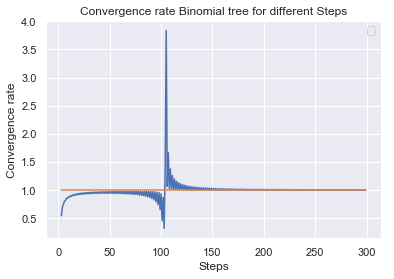

In [11]:
# Calculating convergence rate with linear convergence formula

convergance =[]
for i in range(2,len(val_binomial)):
    conv = abs(val_binomial[i] - val_binomial[i-1] )/(abs(val_binomial[i-1] - val_binomial[i-2] ))**1
    convergance.append(conv)


# print(convergance)
plt.plot(steps[2:],convergance)
plt.plot(steps[2:], np.ones(len(steps)-2))
plt.xlabel('Steps')
plt.ylabel('Convergence rate')
plt.legend()
plt.title('Convergence rate Binomial tree for different Steps')

#print(convergance)

# Estimating order of convergence?

qs = []
for i in range(3,len(val_binomial)):
    q = np.log(abs((val_binomial[i] - val_binomial[i-1] )/(val_binomial[i-1] - val_binomial[i-2] )))/np.log(abs((val_binomial[i-1] - val_binomial[i-2] )/(val_binomial[i-2] - val_binomial[i-3])))
    qs.append(q)

# print(qs)




No handles with labels found to put in legend.


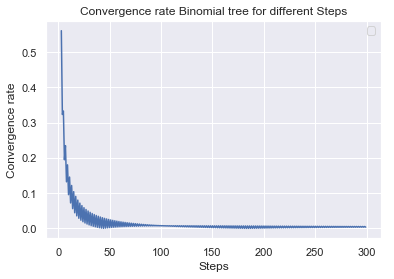

In [15]:
# Calculating convergence rate with difference between binomial and black scholes

convergance =[]
for i in range(2,len(val_binomial)):
    conv = abs(val_binomial[i] - black_scholes_values[0] )
    convergance.append(conv)


# print(convergance)
plt.plot(steps[2:],convergance)
#plt.plot(steps[2:], np.ones(len(steps)-2))
plt.xlabel('Steps')
plt.ylabel('Convergence rate')
plt.legend()
plt.title('Convergence rate Binomial tree for different steps')

#print(convergance)

# Estimating order of convergence?

qs = []
for i in range(3,len(val_binomial)):
    q = np.log(abs((val_binomial[i] - val_binomial[i-1] )/(val_binomial[i-1] - val_binomial[i-2] )))/np.log(abs((val_binomial[i-1] - val_binomial[i-2] )/(val_binomial[i-2] - val_binomial[i-3])))
    qs.append(q)

# print(qs)



#### Calculate Delta?

In [45]:
# For volatility = 0.2:
sigma = 0.2
stock_price_T0 = 100
T = 1
N = 25
strike_price = 99
r = 0.06

# del values_bs,tree,val_bin
values_bs = black_scholes.callBlackScholes(stock_price_T0,T,r,strike_price,sigma)
tree = european_binomial_tree.buildTree(stock_price_T0, sigma, T, N)
val_bin=european_binomial_tree.valueEuropeanOptionMatrix(tree, T, r, strike_price,N, sigma, option_type)

#Calculate and append Delta values

delta_binomial = (val_bin[1][1]-val_bin[1][0])/(tree[1][1]-tree[1][0])
delta_black_scholes = values_bs[1]

print(delta_binomial, delta_black_scholes)



0.67115162955619 0.6737355117348961


In [46]:
# For different values of volatility(calculation was done in a previous cell)

df_deltas['Difference'] = df_deltas['Binomial Delta'] - df_deltas['Black Scholes Delta']

df_deltas

,Binomial Delta,Black Scholes Delta,Difference
Volatility,,,
0.010000,1.000000,1.000000,1.184941e-12
0.022048,0.999442,0.999284,1.580817e-04
0.034096,0.981754,0.980845,9.088412e-04
0.046145,0.937809,0.938358,-5.486692e-04
0.058193,0.889386,0.891186,-1.799535e-03
...,...,...,...
2.961807,0.932217,0.933781,-1.563533e-03
2.973855,0.932978,0.934540,-1.561849e-03
2.985904,0.933732,0.935292,-1.560084e-03


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Change in Delta for different Volatilities')

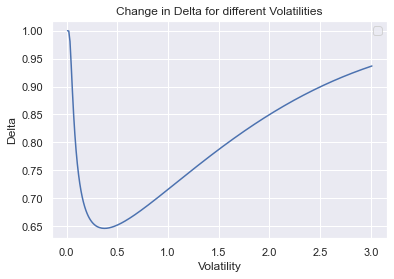

In [49]:
plt.plot(df_deltas['Black Scholes Delta'])
plt.ylabel('Delta')
plt.xlabel('Volatility')
plt.legend()
plt.title('Change in Delta for different Volatilities')




### American


In [59]:
        
sigma = 0.2
stock_price_T0 = 100
T = 1
N = 50
strike_price = 99
r = 0.06



tree_eu = european_binomial_tree.buildTree(stock_price_T0, sigma, T, N)
tree_am = american_binomial_tree.buildTree(stock_price_T0, sigma, T, N)


option_worth_eu_put=european_binomial_tree.valueEuropeanOptionMatrix(tree_eu, T, r, strike_price,N, sigma, option_type = "Put")
option_worth_am_put=american_binomial_tree.valueAmericanOptionMatrix(tree_am, T, r, strike_price,N, sigma, option_type = "Put")
option_worth_eu_call=european_binomial_tree.valueEuropeanOptionMatrix(tree_eu, T, r, strike_price,N, sigma, option_type = "Call")
option_worth_am_call=american_binomial_tree.valueAmericanOptionMatrix(tree_am, T, r, strike_price,N, sigma, option_type = "Call")



# f'exact soltion: {x_exact} \n' 
print(f"Price comparison between european and american options: \n Put option price: American = {option_worth_am_put[0][0]} , European = {option_worth_eu_put[0][0]} \n Call option price: American = {option_worth_am_call[0][0]} , European = {option_worth_eu_call[0][0]}")


Price comparison between european and american options: 
 Put option price: American = 5.347763498417651 , European = 4.781123675595922 
 Call option price: American = 11.546434850755071 , European = 11.546434850755071
